<a href="https://colab.research.google.com/github/adibayaseen/PPI-Inhibitors/blob/main/code/Only%20GearNet%20Embedding%20Torchdrug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Set the Runtime->Change Runtime Type to GPU**

# Protein 3d structure assessment with graph neural networks

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#!rm -r Data
!rm -r PPI-Inhibitors
!pip install biopython
!git clone https://github.com/adibayaseen/PPI-Inhibitors
#!pip install py3Dmol

In [ ]:
!pip install rdkit

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
def getFP(s,r = 3,nBits =2048):
    compound = Chem.MolFromSmiles(s.strip())
    if compound is not None:
        fp = AllChem.GetMorganFingerprintAsBitVect(compound, r, nBits = nBits)
        #fp = pat.GetAvalonCountFP(compound,nBits=nBits)
        m = np.zeros((0, ), dtype=np.int8)
        DataStructs.ConvertToNumpyArray(fp, m)
        return m
class StandardScalerTorch:

    def __init__(self, mean=None, std=None, epsilon=1e-7):
        """Standard Scaler.
        The class can be used to normalize PyTorch Tensors using native functions. The module does not expect the
        tensors to be of any specific shape; as long as the features are the last dimension in the tensor, the module
        will work fine.
        :param mean: The mean of the features. The property will be set after a call to fit.
        :param std: The standard deviation of the features. The property will be set after a call to fit.
        :param epsilon: Used to avoid a Division-By-Zero exception.
        """
        self.mean = mean
        self.std = std
        self.epsilon = epsilon

    def fit(self, values):
        #print(values)
        dims = list(range(values.dim() - 1))
        self.mean = torch.mean(values, dim=dims)
        self.std = torch.std(values, dim=dims)

    def transform(self, values):
        return (values - self.mean) / (self.std + self.epsilon)

    def fit_transform(self, values):
        self.fit(values)
        return self.transform(values)


100%|██████████| 15695/15695 [00:00<00:00, 674083.04it/s]
<ipython-input-13-c34803d4d4d9>:85: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Alldata=np.array(Alldata)


test complex  2XA0
test complex  3WN7
test complex  3UVW
test complex  1YCR
test complex  4ESG
test complex  3D9T
test complex  2FLU
test complex  4QC3
test complex  2RNY
test complex  4AJY
test complex  2E3K
test complex  2B4J
test complex  1YCQ
test complex  3DAB
test complex  4GQ6
Epoch 0 Batch loss 1.2314742276254584
LOCOcomplexname 4GQ6 Epoch 0 auc PR 0.694 0.189 loss 0.437
epoch 0 AUCROC 0.6941442573510932 AUCPR 0.18915689695504412 best aucroc 0.6941442573510932 bestepoch 0
Epoch 1 Batch loss 1.3860916149979874
Epoch 2 Batch loss 1.1772988136237588
Epoch 3 Batch loss 1.2170509961479112
Epoch 4 Batch loss 1.1314374154385456
Epoch 5 Batch loss 1.1152698418910456
epoch 5 AUCROC 0.6423724553908017 AUCPR 0.16148319581068094 best aucroc 0.6941442573510932 bestepoch 0
Epoch 6 Batch loss 1.1696639975064853
Epoch 7 Batch loss 1.0964239065714734
Epoch 8 Batch loss 1.0393361890877986
Epoch 9 Batch loss 1.0519230043496735
Epoch 10 Batch loss 0.94715625419313
epoch 10 AUCROC 0.688615229957275

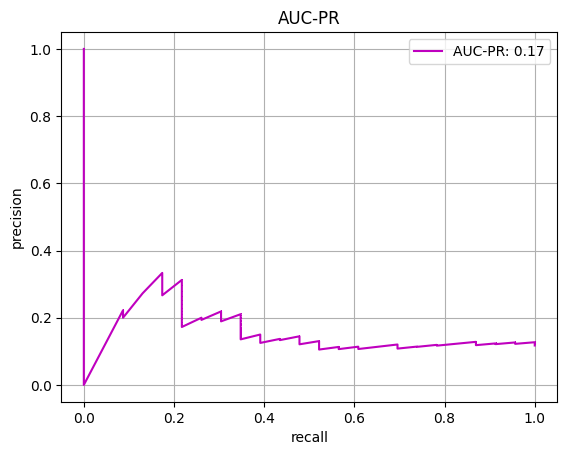

AucROC and aucpr Over all complexes 
 0.54 
 0.17 
total P:N ration 1: 0


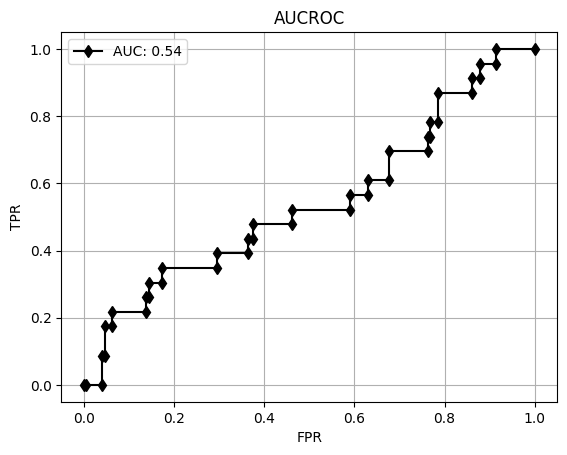

Final average over all folds,Leave one complex out 0.5426 ± 0.0 0.1688 ± 0.0


NameError: name 'Tscores_list' is not defined

In [ ]:
###For Every complex trained model
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
import os
class IPPI_MLP_Net(nn.Module):
    def __init__(self):
        super(IPPI_MLP_Net, self).__init__()
        self.fc1 = nn.Linear(5120, 1024)
        self.fc2 = nn.Linear(1024, 100)
        #self.fc3 = nn.Linear(512, 100)
        self.fc6 = nn.Linear(100, 1)
    def forward(self, LigandFeatures,ProteinInterfaceF):
          Cfeatures=LigandFeatures#torch.FloatTensor()#.cuda()#Compound_Net(LigandFeatures)
          P_all_Features=ProteinInterfaceF
          PC_Features=torch.hstack((P_all_Features,Cfeatures))
          x = torch.tanh(self.fc1(PC_Features))#.to('cuda:0')
          x = torch.relu(self.fc2(x))#.to('cuda:1')
          x = self.fc6(x)
          return x
from sklearn.metrics import roc_auc_score,roc_curve,precision_score,recall_score,average_precision_score
#For End to End LEarning
import pickle
#/content/PPI-Inhibitors/Features/Gearnet_2p2i_Embeddings.pkl
path,githubpath='/content/drive/MyDrive/GNN-PPI-Inhibitor/','/content/PPI-Inhibitors/'
#####Gearnet DBD5
DBD5Gearnetpath=githubpath+'Features/GearNet Features DBD5/'#content/drive/MyDrive/GNN-PPI-Inhibitor/GearNet Features DBD5/'
contents = os.listdir(DBD5Gearnetpath)
#print(contents)
DBD5_Gearnet_dict={}
for k in contents:
  if len(k.split('.pdb'))>1:
    pdbcomp=torch.load(DBD5Gearnetpath+k)
    #name=k.split('_')[0]
    DBD5_Gearnet_dict[k.split('_')[0]]=torch.load(DBD5Gearnetpath+k)#torch.squeeze(pdbcomp.data)
Pos_Gearnet_dict=pickle.load(open(githubpath+'Features/Gearnet_2p2i_Embeddings.pkl','rb'))
#DBD5_Gearnet_dict=pickle.load(open(githubpath+'Features/Gearnet_DBD5_Embeddings.pkl','rb'))#
Complex_AllFeatures_dict=dict( list (Pos_Gearnet_dict.items())+list (DBD5_Gearnet_dict.items()))
##############
ComplexInterfaceFeatures={}
for key in Complex_AllFeatures_dict:
  if len(key.split('.'))>1:
    compname=key.split('.')[0]
    ComplexInterfaceFeatures[compname]=Complex_AllFeatures_dict[key].data#torch.squeeze(
  else:
    ComplexInterfaceFeatures[key]=Complex_AllFeatures_dict[key].data
#################################
CompoundFingerprintFeaturesDict=pickle.load(open(githubpath+'Features/Compound_Fingerprint_Features_Dict.npy',"rb"))
from tqdm import tqdm as tqdm
import pickle
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
import pandas as pd
import random
from sklearn.metrics import auc,precision_recall_curve
###########
with open(githubpath+'Data/WriteAllexamplesRandomBindersIdsAll_24JAN_Binary.txt') as f:
#with open(githubpath+'Data/WriteAllexamplesRandomBindersIdsAll_24JAN.txt') as f:
    D = f.readlines()
Labels=[];Ligandnames=[];Complexs=[];TestPoscomplexes=[];#SMILESlist=[];
for d in tqdm(D):
  if len(d.split())==4:
      TestPoscomp,Complexname,Ligandname,label = d.split()
  else:
      TestPoscomp,Complexname,Ligandname,label = d.split()[0],d.split()[1],(' ').join(d.split()[2:-1]),d.split()[-1]
      #print ("Complexname",Complexname)
  TestPoscomplexes.append(TestPoscomp),Ligandnames.append(Ligandname);Complexs.append(Complexname);Labels.append(float (label))
###########Make dictionary, Rootcomplexname=(complexname,compoundname),label
Allexamples=dict (zip(zip(TestPoscomplexes,zip(Complexs,Ligandnames)),Labels))
#Group kfold
Alldata=list (Allexamples.keys())
KK=[k[0].split('_')[0] for k in Alldata]
groups = pd.DataFrame(KK)
gkf = GroupKFold(n_splits=len(set (KK)))
###########
import pdb
#from torchmetrics.classification import BinaryHingeLoss
AUC_ROC_final=[];Avg_P_final=[];Z=[];Yo=[];Y_t=[];Y_score=[];
from os import listdir
AlltestExamples=[];Externallabels=[];ExternalscoresLOCO=[];covid19_Externallabels=[];covid19_ExternalscoresLOCO=[];Y_score=[];Y_t=[];classratio_dict={};
AUC_ROC_final=[];Avg_P_final=[];
Complexs,Ligandnames, Labels=np.array(Complexs),np.array(Ligandnames),np.array(Labels)
for trainindex, testindex in gkf.split(KK, KK, groups=groups):
    Alldata=np.array(Alldata)
    train,test=Alldata[trainindex],Alldata[testindex]
    Ctr=[];Ptr=[];y_train=[];Ctrname=[];Ptrname=[];Xtr=[];G=[];Cttname=[];Ctt=[];y_test=[];Ptt=[];Pttname=[];best_result=0.0;bestepoch=0;
    #Split train and test
    for t in train:
      GNNcomp=t[1][0].split('_')[0]
      if GNNcomp in ComplexInterfaceFeatures:
        Ctrname.append(t[1][1]);Ctr.append(CompoundFingerprintFeaturesDict[t[1][1]]);
        GearNetF=ComplexInterfaceFeatures[GNNcomp]
        Ptrname.append(GNNcomp);
        Ptr.append (GearNetF[0].numpy())
        y_train.append(Allexamples[t[0],t[1]])
    #Split train and test
    for t in test:
      GNNcomp=t[1][0].split('_')[0]
      if GNNcomp in ComplexInterfaceFeatures:
        Cttname.append(t[1][1]);Ctt.append(CompoundFingerprintFeaturesDict[t[1][1]]);
        GearNetF=ComplexInterfaceFeatures[GNNcomp]
        Pttname.append(GNNcomp);Ptt.append(GearNetF[0].numpy());#ComplexInterfaceFeatures[GNNcomp]);
        y_test.append(Allexamples[t[0],t[1]])
    #standarization of torch
    Pscaler = StandardScaler().fit(Ptr)
    Cscaler = StandardScaler().fit(Ctr)
    Ctr = Cscaler.transform(Ctr)
    Ptr=Pscaler.transform(Ptr)
    Ptt=Pscaler.transform(Ptt)
    Ptrdict=dict (zip(Ptrname,torch.FloatTensor(Ptr).cuda()))
    Ctrdict=dict (zip (Ctrname,torch.FloatTensor( Ctr).cuda()))
    Ctt = Cscaler.transform(Ctt)
    Cttdict=dict (zip (Cttname,torch.FloatTensor( Ctt).cuda()))
    Pttdict=dict (zip(Pttname,torch.FloatTensor(Ptt).cuda()))
    ##########
    IPPI_Net = IPPI_MLP_Net().cuda()
    #############
    criterion  = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(IPPI_Net.parameters(),lr=0.0001,weight_decay=0.0)#001)#0.69 for 1mer single layer#, weight_decay=0.01, betas=(0.9, 0.999))
    y_train=torch.FloatTensor( y_train).cuda()
    ####
    print ("test complex ",test[0][0].split('_')[0] )
    Done=['2E3K','3UVW','3DAB','3WN7','4ESG','4YY6','4QC3','4ESG','2FLU','2XA0','1BXL','1Z92','3D9T','2B4J','2RNY','4AJY','1YCR','1BKD','3TDU','1NW9', '1F47','1YCQ']#,'4GQ6'
    Batchlosslist=[]
    ################load classratio_dict based on rrot complex
    classratio_dict=pickle.load(open(githubpath+'Features/Classratio_GNNdict.npy','rb'))
    Mepoch=0
    if test[0][0].split('_')[0] in Done:
      continue
    for epoch in range(70):
      total_preds = torch.Tensor()
      total_labels = torch.Tensor()
      Batchloss=0
      epoch=epoch+int (Mepoch)
      for n in train:
        complexname,Ligandname =n[1]
        GNNcomplex=complexname.split('_')[0]
        if GNNcomplex in ComplexInterfaceFeatures:
          output=IPPI_Net(Ctrdict[Ligandname],Ptrdict[GNNcomplex])#All_ProteinData_dict[GNNcomplex],,GNN_model)
          y_train=Allexamples[n[0],n[1]]
          loss=criterion(output, torch.FloatTensor([y_train]).cuda())
          if y_train==1.0:
                loss=classratio_dict[GNNcomplex]*loss
          Batchloss=Batchloss+loss
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
      Batchlosslist.append(Batchloss.cpu().data.numpy()/len(train))
      print("Epoch",epoch,"Batch loss",Batchloss.cpu().data.numpy()/len(train))
      Y_t,Y_score=[],[]
      if epoch%5==0 or Batchloss.cpu().data.numpy()/len(train)<0.1:
        #Testing
        Y_score,Y_t=[],[]
        for nt in test:
          complexname,Ligandname =nt[1]
          GNNcomplex=complexname.split('_')[0]
          y_test=Allexamples[nt[0],nt[1]]
          if GNNcomplex in ComplexInterfaceFeatures:
            test_score=IPPI_Net(Cttdict[Ligandname],Pttdict[GNNcomplex])#All_ProteinData_dict[GNNcomplex],,GNN_model)
            Y_score.extend(test_score.cpu().data.numpy())
            Y_t.append(y_test)
        aucroc=roc_auc_score(np.array(Y_t), np.array(Y_score))
        aucpr=average_precision_score(Y_t,Y_score)
        if aucroc>best_result:
            best_result = aucroc
            bestepoch=epoch
            best_model = IPPI_Net.state_dict()
            LOCOcomplexname=test[0][0].split('_')[0]
            print("LOCOcomplexname",LOCOcomplexname,"Epoch",epoch,"auc","PR",aucroc.round(3),aucpr.round(3),"loss",loss.cpu().data.numpy().round(3))
            file_model = path+'/onlyGearNt_IPPI_Net_'+ LOCOcomplexname+'_Epoch'+str (epoch)
            torch.save(IPPI_Net.state_dict(), file_model)
        print('epoch',epoch,'AUCROC',aucroc,'AUCPR',aucpr,'best aucroc',best_result,'bestepoch',bestepoch)
    #Testing
    Y_score,Y_t=[],[]
    for nt in test:
      complexname,Ligandname =nt[1]
      GNNcomplex=complexname.split('_')[0]
      y_test=Allexamples[nt[0],nt[1]]
      if GNNcomplex in ComplexInterfaceFeatures:
        test_score=IPPI_Net(Cttdict[Ligandname],Pttdict[GNNcomplex])#All_ProteinData_dict[GNNcomplex],,GNN_model)
        Y_score.extend(test_score.cpu().data.numpy())
        Y_t.append(y_test)
    TestComplex=test[0][0]
    Z=np.append(Z,Y_score);Yo=np.append(Yo,Y_t);
    Auc=roc_auc_score(np.array(Y_t), np.array(Y_score))
    average_P_score=average_precision_score(Y_t,Y_score)
    np.save(path+TestComplex+'_Loss.npy''_Epoch'+str (epoch),Batchlosslist)
    file_model = path+'/onlyGearNt_IPPI_Net_'+ TestComplex+'_Epoch'+str (epoch)
    torch.save(IPPI_Net.state_dict(), file_model)
    Y_t=np.array(Y_t)
    print(TestComplex,"\t",round (Auc,3),"\t",round (average_P_score,3) ,"\t",np.sum(Y_t[Y_t==1.0]),"\t",np.abs(np.sum(Y_t[Y_t==-1.0])),"\t",round (np.abs(np.sum(Y_t[Y_t==-1.0]))/np.sum(Y_t[Y_t==1.0]),1),"\n")#round (len(testNeg )/len(testPos),1))
    AUC_ROC_final.append(Auc);Avg_P_final.append(average_P_score);
fpr, tpr, thresholds = roc_curve(Yo, Z)#(Y_t, Y_score)
Auc = roc_auc_score(Yo, Z)
Auc=(Auc).round(2)
# calculate precision-recall curve
Z=np.array(Z);Yo=np.array(Yo);
#Y_t=np.array(Y_t);Y_score=np.array(Y_score)
precision, recall, thresholds = precision_recall_curve(Yo, Z)
aucpr=average_precision_score (Yo,Z)
######
fig = plt.figure()
plt.plot(recall,precision,color='m',marker=',',label='AUC-PR:{: .2f}'.format(aucpr))
plt.title('AUC-PR');plt.xlabel('recall');plt.ylabel('precision');plt.grid();plt.legend();plt.show();
fig .savefig(path+"AUC-PR GearNet only PPI Inhibitors .pdf", bbox_inches='tight')
###
aucpr=(aucpr).round(2)
print("AucROC and aucpr Over all complexes \n",Auc,"\n",aucpr,"\ntotal P:N ration 1:",int (np.sum([Yo==-1.0])/np.sum([Yo==1.0])))#,"\n")
#######
fig = plt.figure()
plt.plot(fpr,tpr,color='k',marker='d',label='AUC:{: .2f}'.format(Auc))
plt.title('AUCROC');plt.xlabel('FPR');plt.ylabel('TPR');plt.grid();plt.legend();plt.show();
fig .savefig(path+"AUCROC GearNet only PPI Inhibitors.pdf", bbox_inches='tight')
###
print("Final average over all folds,Leave one complex out",np.average(AUC_ROC_final).round(4),'±',np.std( AUC_ROC_final).round(4),np.average(Avg_P_final).round(4),'±',np.std( Avg_P_final).round(4))
print("averge score of test",np.average(Tscores_list))

100%|██████████| 15695/15695 [00:00<00:00, 341924.00it/s]
<ipython-input-16-e7e01ec88c70>:85: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Alldata=np.array(Alldata)


2XA0 	 0.77 	 0.011 	 3.0 	 0.0 	 0.0
3WN7 	 0.969 	 0.325 	 27.0 	 0.0 	 0.0
3UVW 	 0.628 	 0.204 	 201.0 	 0.0 	 0.0
1YCR 	 0.801 	 0.127 	 51.0 	 0.0 	 0.0
4ESG 	 0.934 	 0.224 	 30.0 	 0.0 	 0.0
3D9T 	 0.781 	 0.097 	 28.0 	 0.0 	 0.0
2FLU 	 0.844 	 0.084 	 12.0 	 0.0 	 0.0
4QC3 	 0.864 	 0.564 	 104.0 	 0.0 	 0.0
2RNY 	 0.59 	 0.175 	 61.0 	 0.0 	 0.0
4AJY 	 0.978 	 0.939 	 90.0 	 0.0 	 0.0
2E3K 	 0.883 	 0.544 	 66.0 	 0.0 	 0.0
2B4J 	 0.872 	 0.54 	 65.0 	 0.0 	 0.0
1YCQ 	 0.792 	 0.167 	 11.0 	 0.0 	 0.0
3DAB 	 0.97 	 0.23 	 5.0 	 0.0 	 0.0
4GQ6 	 0.734 	 0.222 	 23.0 	 0.0 	 0.0
1NW9 	 0.705 	 0.187 	 13.0 	 0.0 	 0.0
4YY6 	 0.633 	 0.235 	 22.0 	 0.0 	 0.0
3TDU 	 0.757 	 0.434 	 20.0 	 0.0 	 0.0
1BKD 	 0.989 	 0.583 	 2.0 	 0.0 	 0.0
1BXL 	 0.651 	 0.323 	 12.0 	 0.0 	 0.0
1Z92 	 0.681 	 0.335 	 7.0 	 0.0 	 0.0
1F47 	 0.647 	 0.302 	 4.0 	 0.0 	 0.0


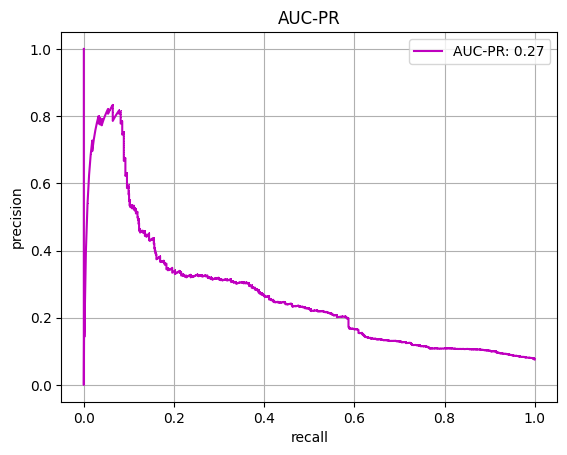

AucROC and aucpr Over all complexes 
 0.74 
 0.27 
total P:N ration 1: 12


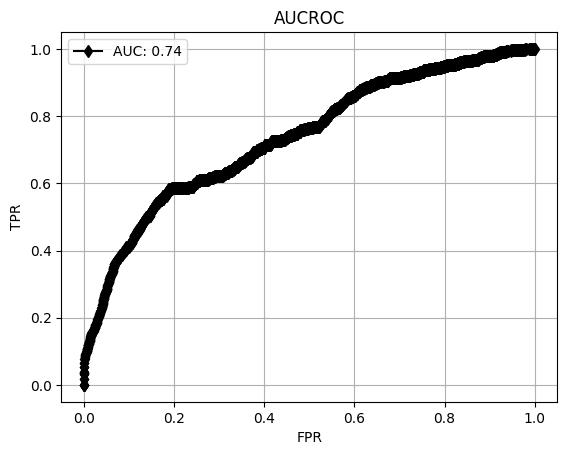

Final average over all folds,Leave one complex out 0.7941 ± 0.124 0.3115 ± 0.21


'\nnp.save(path+\'All_loss.npy\',All_loss)\nnp.save (path+ \'AUC_list.npy\',AUC_list)\nnp.save (path+ \'PR_list.npy\',PR_list)\nfig=plt.figure()\nplt.plot(All_loss,color=\'k\',marker=\',\',label=\'Loss\')\nplt.grid()\nplt.legend()\nfig .savefig(path+"PPI Inhibitors loss over all complexes 30 epochs.pdf", bbox_inches=\'tight\')\n############\nfig=plt.figure()\nplt.plot(All_loss,color=\'k\',marker=\',\',label=\'Loss\')\nplt.plot( AUC_list,color=\'b\',marker=\',\',label=\'AUC\')\nplt.plot( PR_list,color=\'m\',marker=\',\',label=\'PR\')\nplt.grid()\nplt.legend()\nfig .savefig(path+"PPI Inhibitors loss-PR over all complexes.pdf", bbox_inches=\'tight\')\n'

In [ ]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
import os
class IPPI_MLP_Net(nn.Module):
    def __init__(self):
        super(IPPI_MLP_Net, self).__init__()
        self.fc1 = nn.Linear(5120, 1024)
        self.fc2 = nn.Linear(1024, 100)
        #self.fc3 = nn.Linear(512, 100)
        self.fc6 = nn.Linear(100, 1)
    def forward(self, LigandFeatures,ProteinInterfaceF):
          Cfeatures=LigandFeatures#torch.FloatTensor()#.cuda()#Compound_Net(LigandFeatures)
          P_all_Features=ProteinInterfaceF
          PC_Features=torch.hstack((P_all_Features,Cfeatures))
          x = torch.tanh(self.fc1(PC_Features))#.to('cuda:0')
          x = torch.relu(self.fc2(x))#.to('cuda:1')
          x = self.fc6(x)
          return x
from sklearn.metrics import roc_auc_score,roc_curve,precision_score,recall_score,average_precision_score
#For End to End LEarning
import pickle
#/content/PPI-Inhibitors/Features/Gearnet_2p2i_Embeddings.pkl
path,githubpath='/content/drive/MyDrive/GNN-PPI-Inhibitor/','/content/PPI-Inhibitors/'
#####Gearnet DBD5
DBD5Gearnetpath=githubpath+'Features/GearNet Features DBD5/'#content/drive/MyDrive/GNN-PPI-Inhibitor/GearNet Features DBD5/'
contents = os.listdir(DBD5Gearnetpath)
#print(contents)
DBD5_Gearnet_dict={}
for k in contents:
  if len(k.split('.pdb'))>1:
    pdbcomp=torch.load(DBD5Gearnetpath+k)
    #name=k.split('_')[0]
    DBD5_Gearnet_dict[k.split('_')[0]]=torch.load(DBD5Gearnetpath+k)#torch.squeeze(pdbcomp.data)
Pos_Gearnet_dict=pickle.load(open(githubpath+'Features/Gearnet_2p2i_Embeddings.pkl','rb'))
#DBD5_Gearnet_dict=pickle.load(open(githubpath+'Features/Gearnet_DBD5_Embeddings.pkl','rb'))#
Complex_AllFeatures_dict=dict( list (Pos_Gearnet_dict.items())+list (DBD5_Gearnet_dict.items()))
##############
ComplexInterfaceFeatures={}
for key in Complex_AllFeatures_dict:
  if len(key.split('.'))>1:
    compname=key.split('.')[0]
    ComplexInterfaceFeatures[compname]=Complex_AllFeatures_dict[key].data#torch.squeeze(
  else:
    ComplexInterfaceFeatures[key]=Complex_AllFeatures_dict[key].data
#################################
CompoundFingerprintFeaturesDict=pickle.load(open(githubpath+'Features/Compound_Fingerprint_Features_Dict.npy',"rb"))
from tqdm import tqdm as tqdm
import pickle
from sklearn.model_selection import GroupKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
import pandas as pd
import random
from sklearn.metrics import auc,precision_recall_curve
###########
with open(githubpath+'Data/WriteAllexamplesRandomBindersIdsAll_24JAN_Binary.txt') as f:
#with open(githubpath+'Data/WriteAllexamplesRandomBindersIdsAll_24JAN.txt') as f:
    D = f.readlines()
Labels=[];Ligandnames=[];Complexs=[];TestPoscomplexes=[];#SMILESlist=[];
for d in tqdm(D):
  if len(d.split())==4:
      TestPoscomp,Complexname,Ligandname,label = d.split()
  else:
      TestPoscomp,Complexname,Ligandname,label = d.split()[0],d.split()[1],(' ').join(d.split()[2:-1]),d.split()[-1]
      #print ("Complexname",Complexname)
  TestPoscomplexes.append(TestPoscomp),Ligandnames.append(Ligandname);Complexs.append(Complexname);Labels.append(float (label))
###########Make dictionary, Rootcomplexname=(complexname,compoundname),label
Allexamples=dict (zip(zip(TestPoscomplexes,zip(Complexs,Ligandnames)),Labels))
#Group kfold
Alldata=list (Allexamples.keys())
KK=[k[0].split('_')[0] for k in Alldata]
groups = pd.DataFrame(KK)
gkf = GroupKFold(n_splits=len(set (KK)))
###########
import pdb
#from torchmetrics.classification import BinaryHingeLoss
AUC_ROC_final=[];Avg_P_final=[];Z=[];Yo=[];Y_t=[];Y_score=[];
from os import listdir
AlltestExamples=[];Externallabels=[];ExternalscoresLOCO=[];covid19_Externallabels=[];covid19_ExternalscoresLOCO=[];Y_score=[];Y_t=[];classratio_dict={};
AUC_ROC_final=[];Avg_P_final=[];
Complexs,Ligandnames, Labels=np.array(Complexs),np.array(Ligandnames),np.array(Labels)
for trainindex, testindex in gkf.split(KK, KK, groups=groups):
    Alldata=np.array(Alldata)
    train,test=Alldata[trainindex],Alldata[testindex]
    Ctr=[];Ptr=[];y_train=[];Ctrname=[];Ptrname=[];Xtr=[];G=[];Cttname=[];Ctt=[];y_test=[];Ptt=[];Pttname=[];best_result=0.0;
    #Split train and test
    for t in train:
      GNNcomp=t[1][0].split('_')[0]
      if GNNcomp in ComplexInterfaceFeatures:
        Ctrname.append(t[1][1]);Ctr.append(CompoundFingerprintFeaturesDict[t[1][1]]);
        GearNetF=ComplexInterfaceFeatures[GNNcomp]
        Ptrname.append(GNNcomp);
        Ptr.append (GearNetF[0].numpy())
        y_train.append(Allexamples[t[0],t[1]])
    #Split train and test
    for t in test:
      GNNcomp=t[1][0].split('_')[0]
      if GNNcomp in ComplexInterfaceFeatures:
        Cttname.append(t[1][1]);Ctt.append(CompoundFingerprintFeaturesDict[t[1][1]]);
        GearNetF=ComplexInterfaceFeatures[GNNcomp]
        Pttname.append(GNNcomp);Ptt.append(GearNetF[0].numpy());#ComplexInterfaceFeatures[GNNcomp]);
        y_test.append(Allexamples[t[0],t[1]])
    #standarization of torch
    Pscaler = StandardScaler().fit(Ptr)
    Cscaler = StandardScaler().fit(Ctr)
    Ctr = Cscaler.transform(Ctr)
    Ptr=Pscaler.transform(Ptr)
    Ptt=Pscaler.transform(Ptt)
    Ptrdict=dict (zip(Ptrname,torch.FloatTensor(Ptr).cuda()))
    Ctrdict=dict (zip (Ctrname,torch.FloatTensor( Ctr).cuda()))
    Ctt = Cscaler.transform(Ctt)
    Cttdict=dict (zip (Cttname,torch.FloatTensor( Ctt).cuda()))
    Pttdict=dict (zip(Pttname,torch.FloatTensor(Ptt).cuda()))
    ##########
    IPPI_Net = IPPI_MLP_Net().cuda()
    #############
    criterion  = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(IPPI_Net.parameters(),lr=0.0001,weight_decay=0.0)#001)#0.69 for 1mer single layer#, weight_decay=0.01, betas=(0.9, 0.999))
    y_train=torch.FloatTensor( y_train).cuda()
    ####
    LOCOcomplexname=test[0][0].split('_')[0]
    #print ("LOCOcomplexname ",LOCOcomplexname )
    #
    TrainModel_dict={'1BXL':'15','2XA0':'35','3UVW':'40','3WN7':'30','2FLU':'15','4QC3':'30','4YY6':'45','3DAB':'25','2E3K':'15','3D9T':'0','1YCR':'35','1Z92':'15','2RNY':'30','2B4J':'10','4AJY':'35','4ESG':'45','1BKD':'15','3TDU':'45','1F47':'45' ,'1NW9':'45','1YCQ':'35','4GQ6':'40'}
    Batchlosslist=[]
    if LOCOcomplexname in TrainModel_dict:
      Mepoch=TrainModel_dict[LOCOcomplexname]
      Mcomplexname=LOCOcomplexname
      IPPI_Net.load_state_dict(torch.load('/content/PPI-Inhibitors/GearNet Only/onlyGearNt_IPPI_Net_'+ LOCOcomplexname+'_Epoch'+str (Mepoch)))
      #Testing
      Y_score,Y_t=[],[]
      for nt in test:
        complexname,Ligandname =nt[1]
        GNNcomplex=complexname.split('_')[0]
        y_test=Allexamples[nt[0],nt[1]]
        if GNNcomplex in ComplexInterfaceFeatures:
          test_score=IPPI_Net(Cttdict[Ligandname],Pttdict[GNNcomplex])#All_ProteinData_dict[GNNcomplex],,GNN_model)
          Y_score.extend(test_score.cpu().data.numpy())
          Y_t.append(y_test)
      Z=np.append(Z,Y_score);Yo=np.append(Yo,Y_t);
      Auc=roc_auc_score(np.array(Y_t), np.array(Y_score))
      average_P_score=average_precision_score(Y_t,Y_score);Y_t=np.array(Y_t)
      print(LOCOcomplexname,"\t",round (Auc,3),"\t",round (average_P_score,3) ,"\t",np.sum(Y_t[Y_t==1.0]),"\t",np.abs(np.sum(Y_t[Y_t==0.0])),"\t",round (np.abs(np.sum(Y_t[Y_t==0.0]))/np.sum(Y_t[Y_t==1.0]),1))#,"\n")#round (len(testNeg )/len(testPos),1))
      AUC_ROC_final.append(Auc);Avg_P_final.append(average_P_score);
fpr, tpr, thresholds = roc_curve(Yo, Z)#(Y_t, Y_score)
Auc = roc_auc_score(Yo, Z)
Auc=(Auc).round(2)
# calculate precision-recall curve
Z=np.array(Z);Yo=np.array(Yo);
##########
np.save(path+'onlyGearnet_Targets.npy',Yo)
np.save(path+'onlyGearnet_Scores.npy',Z)
####
#Y_t=np.array(Y_t);Y_score=np.array(Y_score)
precision, recall, thresholds = precision_recall_curve(Yo, Z)
aucpr=average_precision_score (Yo, Z)
######
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(recall,precision,color='m',marker=',',label='AUC-PR:{: .2f}'.format(aucpr))
plt.title('AUC-PR');plt.xlabel('recall');plt.ylabel('precision');plt.grid();plt.legend();plt.show();
fig .savefig(path+"AUC-PR GearNet only PPI Inhibitors .pdf", bbox_inches='tight')
###
aucpr=(aucpr).round(2)
print("AucROC and aucpr Over all complexes \n",Auc,"\n",aucpr,"\ntotal P:N ration 1:",int (np.sum([Yo==0.0])/np.sum([Yo==1.0])))#,"\n")
#######
fig = plt.figure()
plt.plot(fpr,tpr,color='k',marker='d',label='AUC:{: .2f}'.format(Auc))
plt.title('AUCROC');plt.xlabel('FPR');plt.ylabel('TPR');plt.grid();plt.legend();plt.show();
fig .savefig(path+"AUCROC GearNet only PPI Inhibitors.pdf", bbox_inches='tight')
###
print("Final average over all folds,Leave one complex out",np.average(AUC_ROC_final).round(4),'±',np.std( AUC_ROC_final).round(4),np.average(Avg_P_final).round(4),'±',np.std( Avg_P_final).round(4))
"""
np.save(path+'All_loss.npy',All_loss)
np.save (path+ 'AUC_list.npy',AUC_list)
np.save (path+ 'PR_list.npy',PR_list)
fig=plt.figure()
plt.plot(All_loss,color='k',marker=',',label='Loss')
plt.grid()
plt.legend()
fig .savefig(path+"PPI Inhibitors loss over all complexes 30 epochs.pdf", bbox_inches='tight')
############
fig=plt.figure()
plt.plot(All_loss,color='k',marker=',',label='Loss')
plt.plot( AUC_list,color='b',marker=',',label='AUC')
plt.plot( PR_list,color='m',marker=',',label='PR')
plt.grid()
plt.legend()
fig .savefig(path+"PPI Inhibitors loss-PR over all complexes.pdf", bbox_inches='tight')
"""